# 1. Support Vector Classifier (SVC)

If we have two axis, x and y. In support vector machine we create a best fit line in case of 2d, along with this best fit line, we also create two lines that are called marginal planes. The distance between two marginal planes should be maximum. The points from which marginal planes passed are know as support vectors.

### Soft Margin and Hard Margin

When points are overlapping, the marginal planes cannot clearly separate all of the points and there will be some error and it's known as soft margin. (Some amount of errors will always be there).

When the points are clearly separated and there is no error then it is known as hard margin.


# SVM Maths Intuition

- distance will be negative for points below the plane.
- distance will be positive for all points above the plane.

# Cost Function
We add a hyperparameter cj and eeta of i it is called as Hinge Loss.

Ci -> how many points we want to avoid misclassification.

eeta -> summation of the distance of the incorrect data points from the marginal plan.

The cost function is related to soft margin

# Support Vector Machine (SVM) Mathematical Equations

## 1. **Primal Optimization Problem (Hard Margin SVM)**

For a linearly separable dataset, the goal is to find the hyperplane that maximizes the margin:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

Subject to the constraints:

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i
$$

Where:
- $(\mathbf{w})$ is the weight vector.
- $(b)$ is the bias term.
- $(\mathbf{x}_i)$ is the feature vector of the $(i)-th$ sample.
- $(y_i \in \{-1, 1\})$ is the class label of the $(i)$-th sample.

---

## 2. **Primal Optimization Problem (Soft Margin SVM)**

For a non-linearly separable dataset, slack variables \(\xi_i\) are introduced to allow misclassifications:

$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i
$$

Subject to the constraints:

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \quad \text{and} \quad \xi_i \geq 0 \quad \forall i
$$

Where:
- \(C\) is the regularization parameter controlling the trade-off between maximizing the margin and minimizing classification errors.
- \(\xi_i\) are the slack variables.

---

## 3. **Dual Optimization Problem**

The primal problem is transformed into the dual problem using Lagrange multipliers \(\alpha_i\):

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j (\mathbf{x}_i \cdot \mathbf{x}_j)
$$

Subject to the constraints:

$$
0 \leq \alpha_i \leq C \quad \text{and} \quad \sum_{i=1}^n \alpha_i y_i = 0
$$

Where:
- \(\alpha_i\) are the Lagrange multipliers.

---

## 4. **Kernel Trick**

For non-linear decision boundaries, the dot product $(\mathbf{x}_i \cdot \mathbf{x}_j)$  is replaced by a kernel function $(K(\mathbf{x}_i, \mathbf{x}_j))$

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)
$$

Common kernel functions include:
- **Linear Kernel**: $(K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j)$
- **Polynomial Kernel**: $(K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i \cdot \mathbf{x}_j + r)^d)$
- **Radial Basis Function (RBF) Kernel**: $(K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2))$

---

## 5. **Decision Function**

The final decision function for classification is:

$$
f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b\right)
$$

Where:
- \(\mathbf{x}\) is the new input vector.
- \(\text{sign}(\cdot)\) returns the class label (\(+1\) or \(-1\)).

# Support Vector Regressor
ϵ is a marginal error that is the error for data points inside the marginal plan

eeta of i in this case is the distance of data points outside the marginal plane.

C is hyperparameter. When the C value increased the loss function will decreased.
loss function |y_i - w_ix_i|

# SVM Kernels

We can't use linear SVC for a non-linear data. So, we can use SVM kernels.

By using kernels we apply some kind of transformation. For example non linear data from 2d is converted into linear data in 3d by using some kind of transformation

# Support Vector Classifier Implementation

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#creating synthetic data points
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class=2, n_redundant=0)
X


array([[-0.11445667,  0.48555569],
       [-0.38352802,  0.4873589 ],
       [ 1.15540032,  1.57339435],
       ...,
       [ 1.15480494,  0.99941987],
       [-2.40854221,  0.15159088],
       [ 0.00718878, -3.04547037]])

In [ ]:
#creating dataframe
df = pd.DataFrame(X)

<Axes: xlabel='0', ylabel='1'>

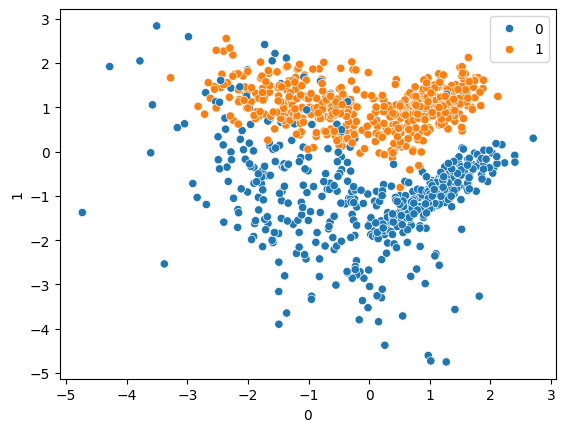

In [ ]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [ ]:
#importing SVC
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

In [ ]:
#split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
#fitting model on training data
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#making predictions on test data
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0])

In [ ]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       116
           1       0.88      0.98      0.93        84

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
#fitting svm model with rbf kernel
rbf = SVC(kernel = "rbf")
rbf.fit(X_train, y_train)

SVC()

In [ ]:
#making predictions
y_pred = rbf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       116
           1       0.93      0.99      0.96        84

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [ ]:
#svm model with poly kernel
poly = SVC(kernel = "poly")
poly.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
#making predictions
y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       116
           1       0.86      0.85      0.85        84

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200



In [ ]:
#svm model with sigmoid kernel
sigmoid = SVC(kernel = "sigmoid")
sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
#making predictions
y_pred = sigmoid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       116
           1       0.82      0.92      0.87        84

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.88      0.88       200



In [ ]:
sigmoid.intercept_

array([-0.17534739])

# Hyperparameter Tuning

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {"C":[0.1, 1, 10, 100, 1000],
              "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
               "kernel":["rbf", "linear", "polynomial"]}


In [ ]:
#fitting grid search on training data
svc = SVC()
grid_cv = GridSearchCV(svc, param_grid=param_grid, cv = 5, verbose = 3, refit = True)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.919 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomi

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial']},
             verbose=3)

In [ ]:
#best parameters from grid search
grid_cv.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
#making predictions
y_pred3 = grid_cv.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       116
           1       0.93      0.99      0.96        84

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

[[110   6]
 [  1  83]]


# SVM Kernels Indepth Intuition And Practical Explanation

In [ ]:
#creating data using linspace for class 0
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])


In [ ]:
#creating data using linspace for class 1
np.random.seed(100)
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

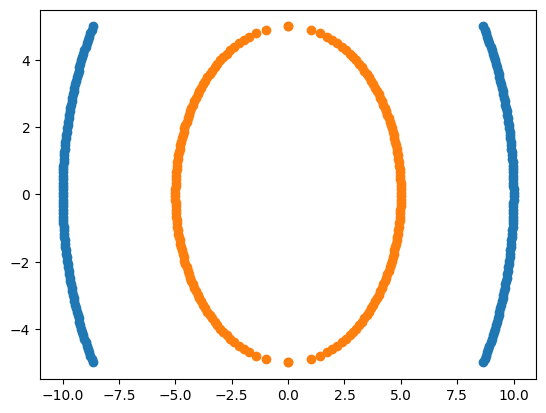

In [ ]:
#visualizing data
plt.scatter(y, x)
plt.scatter(y1, x1)

In [ ]:
#creating data frame for class 0
df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1', 'X2'])
df1["Y"] = 0
df1.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
#creating data frame for class 1
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns = ['X1', 'X2'])
df2["Y"] = 1
df2.head()

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [ ]:
#creating main data frame
df = pd.concat([df1, df2])
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
#separating input and output features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
#split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# we need to find components for the polynomial kernel
# X1, X2, X1_square, X2_square, X1 * X2
df["X1_Square"] = df["X1"] **2
df["X2_Square"] = df["X2"] ** 2
df["X1*X2"] = df["X1"] * df["X2"]
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [ ]:
X2 = df.iloc[:, :-1]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.25, random_state = 42)


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = "X1", y = "X2", z = "X1*X2", color = "Y")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = "X1_Square", y = "X2_Square", z = "X1*X2", color = "Y")
fig.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "linear")
classifier.fit(X_train2, y_train2)
y_pred = classifier.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred)
accuracy

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.675

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = "sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.55

# Support Vector Regression Implementation

In [ ]:
#loading tips dataset
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
#checking value of counts of sex
df["sex"].value_counts()

,count
sex,
Male,157
Female,87


In [ ]:
#checking value of counts of smoker
df["smoker"].value_counts()

,count
smoker,
No,151
Yes,93


In [ ]:
#checking value of counts of day
df["day"].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
#checking value of counts oftime
df["time"].value_counts()

,count
time,
Dinner,176
Lunch,68


In [ ]:
# separate independent and dependent features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
#split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Feature Encoding (Label Encoding and One Hot Encoding)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
#label encoding binary variables in training data
X_train["sex"] = le1.fit_transform(X_train["sex"])
X_train["smoker"] =le2.fit_transform(X_train["smoker"])
X_train["time"] =le3.fit_transform(X_train["time"])
X_train

,tip,sex,smoker,day,time,size
115,3.50,0,0,Sun,0,2
181,5.65,1,1,Sun,0,2
225,2.50,0,1,Fri,1,2
68,2.01,1,0,Sat,0,2
104,4.08,0,0,Sat,0,2
...,...,...,...,...,...,...
106,4.06,1,1,Sat,0,2
14,3.02,0,0,Sun,0,2
92,1.00,0,1,Fri,0,2
179,3.55,1,1,Sun,0,2


In [ ]:
#label encoding binary variables in test data
X_test["sex"] = le1.transform(X_test["sex"])
X_test["smoker"] =le2.transform(X_test["smoker"])
X_test["time"] =le3.transform(X_test["time"])

In [ ]:
#one hot encoding day variable
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("onehot",OneHotEncoder(drop="first"), [3])],remainder="passthrough")


In [ ]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# support vector regression
from sklearn.svm import SVR
svr = SVR()

In [ ]:
#fit model
svr.fit(X_train, y_train)

SVR()

In [ ]:
#make predictions
y_pred = svr.predict(X_test)

In [ ]:
#r-square and mean absolute error
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.49798620106004743
4.463296539661225


In [ ]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#defining parameter grid
param_grid = {"C":[0.1, 1, 10, 100, 1000],
              "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
              "kernel":["rbf"]}


In [ ]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

#fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.114 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.019 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.078 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.099 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.102 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
#r-square and mean absolute error
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.5630727637616455
4.260483973872266
